# PP 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

## Loss function

In this section, the loss function and the corresponding derivative of the loss function are defined.

In [2]:
def loss(predicted_y, actual_y):
    return (predicted_y - actual_y) ** 2 / 2

def d_loss(predicted_y, actual_y):
    return predicted_y - actual_y

## Gradient Boosting

This model was implemented according to the pseudo code of Wikipedia (https://en.wikipedia.org/wiki/Gradient_boosting).


M indicates the number of weak learners which is the decision tree classifier whit a maximum depth of 2.


* Initialize model with a constant value

&emsp;&emsp;&emsp;
$F_0(X) = argmin_c \sum_{i=1}^{n} L(y_i, c)$

* For m = 1 to M:

&emsp;&emsp;&emsp;
Compute so-called pseudo-residuals:

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$r_{i} = - \frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}$&emsp;$for \; i = 0, ..., n $

&emsp;&emsp;&emsp;
Fit a base learner (or weak learner, e.g. tree) closed under scaling $h_{m}(x)$ to pseudo-residuals, i.e. train it using the training set $(X, R)$

&emsp;&emsp;&emsp;
Update the model:

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
$F_m(X) = F_{m-1}(X) + rate * g(X)$

* The model is $F_M(X)$

In [3]:
class GradientBoosting:
    def __init__(self, M=5, rate=0.5):
        self.F = []
        self.M = M
        self.rate = rate

    def predict(self, X):
        y = []
        for i in range(len(X)):
            res = 0
            for f in self.F:
                res += self.rate * f(X.iloc[[i]])
            y.append((np.abs([0, 1, 2] - res)).argmin())
        return y

    def fit(self, X, y):
        # F_0(X)
        l = np.array([sum([loss(c, i) for i in y]) for c in [0, 1, 2]])
        self.F.append(lambda x: np.argmin(l))
        # F_m(X)
        for m in range(1, self.M):
            r = np.array([-d_loss(self.F[m-1](X.iloc[[i]]), y[i]) for i in range(len(X))])
            dt = DecisionTreeClassifier(max_depth=2)
            dt.fit(X, r)
            self.F.append(dt.predict)

## Loading Data

In [4]:
iris = datasets.load_iris()
X = iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

## Training Model

The gradient boosting learner with 6 weak learners is constructed and trained

In [27]:
gradientBoosting = GradientBoosting(M=4, rate=0.5)
gradientBoosting.fit(X_train, y_train)


Accuracy: 0.8695652173913043
Recall: 0.8695652173913043
Precision: 0.8695652173913043
F1: 0.8695652173913043


Text(0.5, 1.0, 'Confusion Matrix')

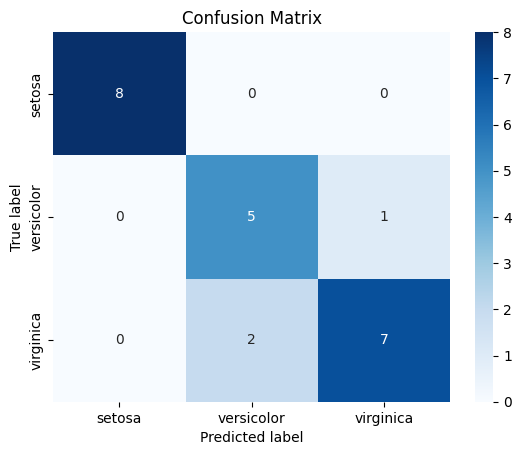

In [28]:
pred_y = gradientBoosting.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, pred_y)}')
print(f'Recall: {recall_score(y_test, pred_y, average="micro")}')
print(f'Precision: {precision_score(y_test, pred_y, average="micro")}')
print(f'F1: {f1_score(y_test, pred_y, average="micro")}')
conf_matrix = confusion_matrix(y_test, pred_y)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, xticklabels=iris.target_names , yticklabels=iris.target_names, annot=True, cmap='Blues')
ax.set_xlabel( "Predicted label")
ax.set_ylabel( "True label")
ax.set_title( "Confusion Matrix") 

## comparing different numbers of weak learners

In [17]:
num_weak_learner = [i for i in range(1, 21)]

In [25]:
accuracies = []
for m in num_weak_learner:
    gradientBoosting = GradientBoosting(M=m, rate=0.5)
    gradientBoosting.fit(X_train, y_train)
    pred_y = gradientBoosting.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred_y))

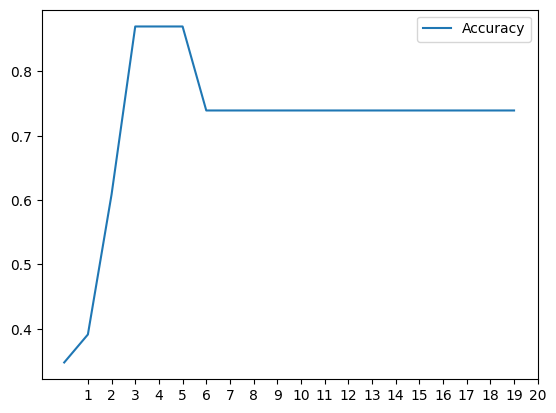

In [26]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'Accuracy': accuracies})

sns.lineplot(data=df)
plt.xticks([i for i in range(1, 21)])
plt.show()